In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

#Data

Load Data

In [ ]:
data = pd.read_csv("/content/drive/My Drive/5001/features_3_sec.csv")
data = data.iloc[0:, 2:]
print(data.shape)
data.groupby(data['label']).describe()

(9990, 58)


chroma_stft_mean            ... mfcc20_var            
                     count      mean  ...        75%         max
label                                 ...                       
blues               1000.0  0.342438  ...  74.225649  342.770660
classical            998.0  0.264508  ...  94.456089  737.327026
country              997.0  0.344996  ...  58.092171  420.138336
disco                999.0  0.416377  ...  63.786512  273.096924
hiphop               998.0  0.454590  ...  64.536987  270.835205
jazz                1000.0  0.297520  ...  97.263458  910.473206
metal               1000.0  0.480162  ...  36.905983  140.289459
pop                 1000.0  0.398089  ...  90.022551  395.797638
reggae              1000.0  0.408984  ...  66.084873  288.070251
rock                 998.0  0.387546  ...  48.724070  308.389771

[10 rows x 456 columns]

Partitioning

In [ ]:
Y = data['label']
X = data.iloc[:,:57]
map_label = {"blues":0, "classical":1, "country":2, "disco":3, "hiphop":4, "jazz":5, "metal":6, "pop":7, "reggae":8, "rock":9}
Y = Y.map(lambda x: map_label[x])
classes=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.25, random_state=1)
print(Y_train.value_counts())

3    772
9    760
7    757
5    755
1    754
8    754
6    744
0    741
2    732
4    723
Name: label, dtype: int64


Normalization

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)

# if normalization
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

PCA

In [ ]:
pca = PCA(n_components=20).fit(X_train)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

# if PCA
#X_train = pca.transform(X_train)
#X_test = pca.transform(X_test)

[0.2015336  0.13564635 0.10385804 0.0661976  0.04361367 0.03654926
 0.02919056 0.0268082  0.02483738 0.02124068 0.01857655 0.01747891
 0.01711436 0.01485993 0.01339703 0.0116641  0.01109015 0.01059099
 0.0096318  0.00895576]
0.8228349155395737


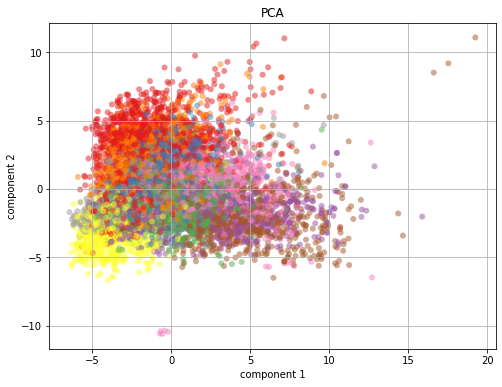

In [ ]:
#map_color = {"blues":"g", "classical":"r", "country":"deepskyblue", "disco":"darkorchid", "hiphop":"orange", "jazz":"y", "metal":"pink", "pop":"c", "reggae":"y", "rock":"coral"}
#color = list(map(lambda x: map_color[x], Y_train))
projected = pca.transform(X_train)
plt.figure(figsize=(8, 6))
plt.scatter(projected[:, 0], projected[:, 1], c=plt.cm.Set1(Y_train/10), edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("PCA")
plt.grid()
plt.show()

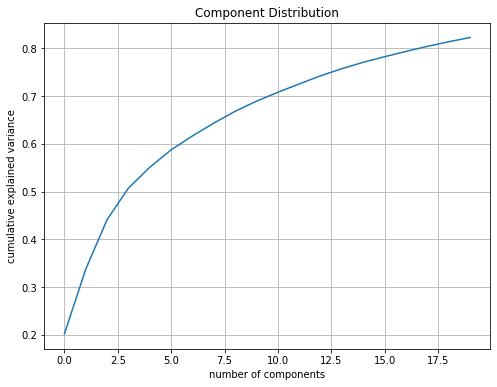

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Component Distribution')
plt.grid()
plt.show()

T-SNE

In [ ]:
tsne = manifold.TSNE(n_components=2, init='pca', n_iter=1000, random_state=1)

# if t-SNE
#X_train = tsne.transform(X_train)
#X_test = tsne.transform(X_test)

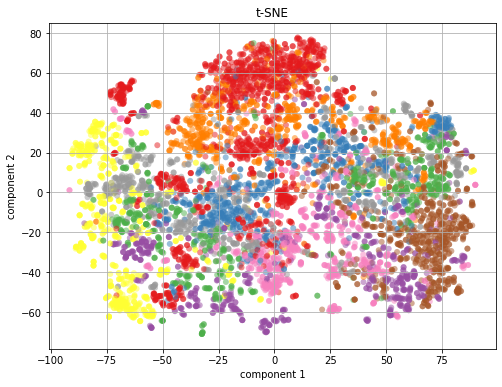

In [ ]:
result = tsne.fit_transform(X_train)
plt.figure(figsize=(8, 6))
plt.scatter(result[:, 0], result[:, 1], c=plt.cm.Set1(Y_train/10), edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("t-SNE")
plt.grid()
plt.show()

# Classification

In [ ]:
model = [0]*10
mname = [0]*10

0. Logistic Regression

In [ ]:
model[0] = LogisticRegression(max_iter=1000,solver='adam')
mname[0] = 'Logistic Regression'
model[0].fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
score = cross_val_score(model[0],X_train,Y_train,cv=5,scoring='accuracy')
print(score)
print(score.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.73649099 0.7251501  0.71962617 0.70093458 0.71829105]
0.7200985792931824


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1. KNN

In [ ]:
model[1] = KNeighborsClassifier()
mname[1] = 'KNN'
model[1].fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
score = cross_val_score(model[1],X_train,Y_train,cv=5,scoring='accuracy')
print(score)
print(score.mean())

[0.85123416 0.86724483 0.8518024  0.86782377 0.87182911]
0.8619868519377849


2. Decision Tree

In [ ]:
model[2] = DecisionTreeClassifier()
mname[2] = 'Dicission Tree'
model[2].fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
score = cross_val_score(model[2],X_train,Y_train,cv=5,scoring='accuracy')
print(score)
print(score.mean())

[0.63375584 0.6490994  0.61148198 0.65420561 0.61748999]
0.6332065613836015


3. Random Forest

In [ ]:
model[3] = RandomForestClassifier()
mname[3] = 'Random Forest'
model[3].fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
score = cross_val_score(model[3],X_train,Y_train,cv=5,scoring='accuracy')
print(score)
print(score.mean())

[0.84856571 0.83122081 0.83711615 0.84913218 0.84445928]
0.8420988268992857


4. Naive Bayes

In [ ]:
model[4] = GaussianNB()
mname[4] = 'Naive Bayes'
model[4].fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
score = cross_val_score(model[4],X_train,Y_train,cv=5,scoring='accuracy')
print(score)
print(score.mean())

[0.5203469  0.51967979 0.49799733 0.52670227 0.51869159]
0.5166835745414611


5. SVM (Poly)

In [ ]:
model[5] = SVC(kernel='poly')
mname[5] = 'SVM'
model[5].fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
score = cross_val_score(model[5],X_train,Y_train,cv=5,scoring='accuracy')
print(score)
print(score.mean())

[0.79986658 0.7951968  0.77570093 0.78571429 0.79906542]
0.791108803287639


6. SVM (RBF)

In [ ]:
model[6] = SVC()
mname[6] = 'SVM (RBF)'
model[6].fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
score = cross_val_score(model[6],X_train,Y_train,cv=5,scoring='accuracy')
print(score)
print(score.mean())

[0.85056704 0.82254837 0.83911883 0.83845127 0.84846462]
0.8398300246448234


7. Neural Net Work

In [ ]:
model[7] = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(256,128,64,10), max_iter=400, learning_rate_init=0.005)
mname[7] = 'Neural Net Work'
model[7].fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(256, 128, 64, 10), learning_rate='constant',
              learning_rate_init=0.005, max_fun=15000, max_iter=400,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
score = cross_val_score(model[7],X_train,Y_train,cv=5,scoring='accuracy')
print(score)
print(score.mean())

[0.88458973 0.88859239 0.84712951 0.87383178 0.88251001]
0.8753306832948713


8. XGBoost (Random forest)

In [ ]:
model[8] = XGBRFClassifier()
mname[8] = 'XGBoost (RF)'
model[8].fit(X_train, Y_train)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
                max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
                n_jobs=1, nthread=None, objective='multi:softprob',
                random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                seed=None, silent=None, subsample=0.8, verbosity=1)

In [ ]:
score = cross_val_score(model[8],X_train,Y_train,cv=5,scoring='accuracy')
print(score)
print(score.mean())

[0.60507005 0.59906604 0.57209613 0.58344459 0.5787717 ]
0.5876897014565118


9. XGBoost

In [ ]:
model[9] = XGBClassifier(n_estimators=500, learning_rate=0.05)
mname[9] = 'XGBoost'
model[9].fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
score = cross_val_score(model[9],X_train,Y_train,cv=5,scoring='accuracy')
print(score)
print(score.mean())

[0.86190794 0.83122081 0.83044059 0.84445928 0.83044059]
0.8396938412880506


#Evaluation

In [ ]:
pred = [0]*10
acu = [0]*10
print('-------------Accuracy-------------')
print()
for i in range(10):
  pred[i] = model[i].predict(X_test)
  acu[i] = accuracy_score(y_true=Y_test, y_pred=pred[i])
  print(mname[i] + ': ' + str(acu[i]))

-------------Accuracy-------------

Logistic Regression: 0.732586068855084
KNN: 0.8867093674939952
Dicission Tree: 0.6629303442754203
Random Forest: 0.8751000800640513
Naive Bayes: 0.5260208166533227
SVM: 0.811449159327462
SVM (RBF): 0.8582866293034428
Neural Net Work: 0.8847077662129704
XGBoost (RF): 0.5972778222578062
XGBoost: 0.8526821457165733


In [ ]:
def plot_confusion_matrix(cm, cmap=plt.cm.Blues):
  print('Confusion matrix')
  #print(cm)

  fig, ax = plt.subplots(figsize=(8, 6))
  im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
  ax.figure.colorbar(im, ax=ax)

  # We want to show all ticks...
  ax.set(xticks=np.arange(cm.shape[1]),
      yticks=np.arange(cm.shape[0]),
      xticklabels=classes, 
      yticklabels=classes,
      title='Confusion matrix',
      ylabel='True label',
      xlabel='Predicted label')
  
  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
  
  # Loop over data dimensions and create text annotations.
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      ax.text(j, i, format(cm[i, j]), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
  fig.tight_layout()
  plt.show()
  return ax

Confusion matrix


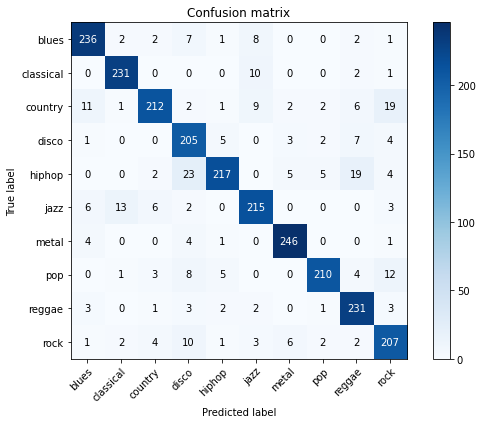

In [ ]:
cm = confusion_matrix(y_true=Y_test, y_pred=pred[7])
plot_confusion_matrix(cm)

30s

In [ ]:
test = pd.read_csv("/content/drive/My Drive/5001/features_30_sec.csv")
test = test.iloc[0:, 2:]
y = test['label']
x = test.iloc[:,:57]
y = y.map(lambda x: map_label[x])
x = scaler.transform(x)

In [ ]:
pred30 = [0]*10
acu30 = [0]*10
print('-------------Accuracy-------------')
print()
for i in range(10):
  pred30[i] = model[i].predict(x)
  acu30[i] = accuracy_score(y_true=y, y_pred=pred30[i])
  print(mname[i] + ': ' + str(acu30[i]))

-------------Accuracy-------------

Logistic Regression: 0.7415415415415415
KNN: 0.9215215215215216
Dicission Tree: 0.9151151151151151
Random Forest: 0.9681681681681682
Naive Bayes: 0.5264264264264265
SVM: 0.8650650650650651
SVM (RBF): 0.9057057057057057
Neural Net Work: 0.963963963963964
XGBoost (RF): 0.6158158158158158
XGBoost: 0.9458458458458459


Confusion matrix


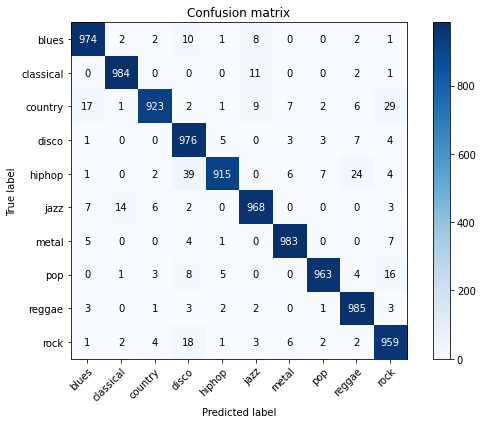

In [ ]:
cm = confusion_matrix(y_true=y, y_pred=pred30[7])
plot_confusion_matrix(cm)